In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import os.path as osp
import sys

sys.path.insert(0,'src')

In [2]:
from data_funcs import plot_data

## Data

Fuel moisture content (FM) is a critical component of wildfire susceptibility and fire spread. It is a measure of the water content in vegetation. Dry fuels burn more readily, and wetter fuels burn more slowly or not at all. Atmospheric conditions affect FM in a variety of ways. Temperature is a key component of FM; warmer temperatures dry out fuels, with other factors being held constant. Relative humidity (RH) is another key component of FM; more moisture in the air generally leads to more moisture in fuels. Higher wind speeds lead to drier fuels. Finally, solar radiation dries out fuels. Cloudy days with little direct solar radiation will generally lead to higher FM conditions. It is important to note that these atmospheric conditions relate to each other in complicated ways. For example, higher temperatures can cause lower RH and are also associated with stronger solar radiation, all of which lead to lower FM. However, higher temperatures can cause more evaporation and lead to increases in precipitation, which in turn increases FM. There are many other local conditions that affect fuel moisture, many of which are difficult to resolve in a modeling context. For example, wind speed interacts with the slope angle of the terrain. Wind that blows upslope tends to make more contact with fuels and thus dry fuels out faster. Many of these local conditions will not be included in modeling in this project.      |a ||

The table below summarizes the atmospheric variables used in this project to model FM. All of these variables are defined at the surface level, they have various other units and definitions at higher altitudes.

| Name              | Units  |
|-------------------|--------|
| Air Temperature   | K    | 
| Relative Humidity | %    |
| Precipitation     | mm/h |
| Wind Speed        | m/s  |
| Solar Radiation   | kWh/m2 |

Researchers often choose to model dead fuel moisture, or the water content of dead vegetation. This is due to several factors. Living plants try to maintain homeostasis, so they resist large fluctuations in moisture caused by atmospheric conditions. The water content of dead fuel, on the other hand, responds readily to atmospheric conditions and therefore there can be large fluctuations that are relevant to wildfire spread. Additionally, live fuels are thought of as composites of various fuel types. A sagebrush, for example, has woody material of various diameters as well as herbaceous material. These various materials retain moisture in different ways and respond to fire differently. 

Dead fuel moisture is divided into different classes based on how quickly the material responds to changes in atmospheric conditions. These include 1-hour, 10-hour, 100-hour, and 1,000-hour fuels. This category is defined as the time it would take for 2/3 of the fuel to change FM in response to changing atmospheric conditions. A 1-hour fuel, very small twigs for example, will get wetter quickly when exposed to rain, while a 1,000-hour fuel like a fallen log would take much longer to absorb rain and adjust its FM. In this project, we will work only with dead 10-hour fuels.

The National Oceanic and Atmospheric Administration (NOAA) operates Remote Automatic Weather Stations (RAWS) across the country to measure hourly FM and other associated environmental variables.

![](images/raws_stations.png)

The plot below shows 1 week of FM observations. The x-axis is arranged in 24-hour periods. Notice the clear cyclical pattern throughout a day where the highs and lows of FM occur with 24-hour periods. There was zero rainfall at this station over this week, so the patterns of FM are relatively smooth.

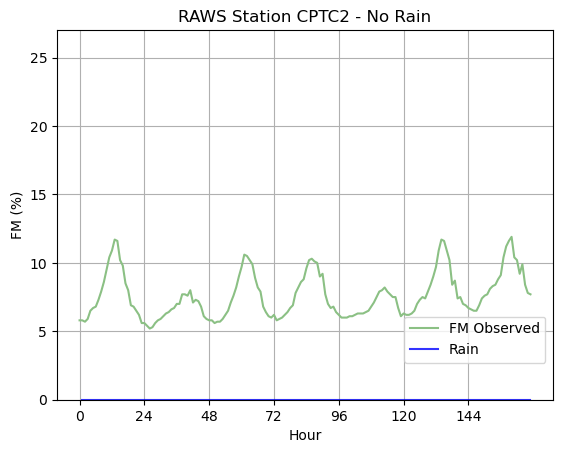

In [53]:
dat = pd.read_pickle('data/raws_dat.pickle') # all RAWS observations

dat = dat['CPTC2'] # restrict to one station for visualization

hours = 24*30 # one month of data

plt.plot(dat['fm'][0:24*7], linestyle='-',c='#8BC084',label='FM Observed')
plt.plot(dat['rain'][0:24*7], c='b',label='Rain', alpha=.8)
plt.legend()
plt.ylabel("FM (%)")
plt.xlabel("Hour")
plt.ylim(0, 27)
plt.xticks(range(0, 24*7, 24))
plt.legend(loc=(.7, .1))
plt.title("RAWS Station CPTC2 - No Rain")
plt.grid()

In another time period at the same location, there are several rainfall instances. The rain comes in short bursts and there are associated spikes in the FM.

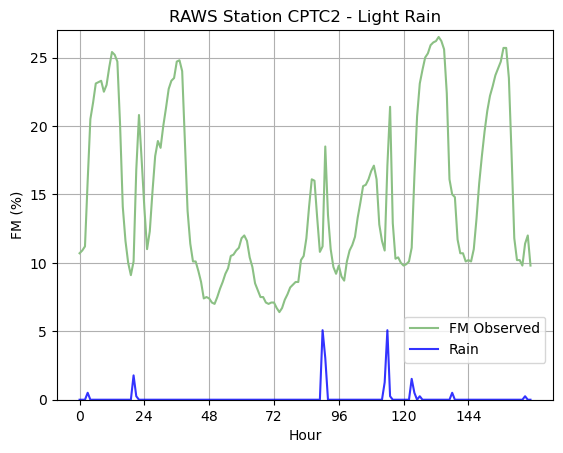

In [55]:
plt.plot(dat['fm'][24*14:24*21], linestyle='-',c='#8BC084',label='FM Observed')
plt.plot(dat['rain'][24*14:24*21], c='b',label='Rain', alpha=.8)
plt.legend()
plt.ylabel("FM (%)")
plt.xlabel("Hour")
plt.xticks(range(0, 24*7, 24))
plt.ylim(0, 27)
plt.legend(loc=(.7, .1))
plt.title("RAWS Station CPTC2 - Light Rain")
plt.grid()

## References

* Open Wildland Fire Modeling E Community. https://wiki.openwfm.org/wiki/
* National Wildfire Coordinating Group (NWCG). https://www.nwcg.gov/course/ffm/
* *Dead Fuel Moisture*, NOAA National Centers for Environmental Information. https://www.ncei.noaa.gov/access/monitoring/dyk/deadfuelmoisture